In [1]:
# THis noteboplk read andd plot the reusltd in the logfile of LAMMPS simulations from the NPT simulation of 5 ns

import numpy as np
import matplotlib.pyplot as plt
import lammps_logfile


In [2]:
##DEfine function to read lammps log file from NPT equilibration and make plots of Temperature, pressure, potential energy and density

import numpy as np
import matplotlib.pyplot as plt
import lammps_logfile

def npt_analysis_mid(log_file_name,P,T):

    
    #read log file
    log = lammps_logfile.File(log_file_name)
    step = log.get("Step") ## Read steps
    time = log.get("Time")
    # Change the figure size
    plt.figure(figsize=[12, 12])
    
    # Set title 
    plt.suptitle('NPT simulation Analysis P(atm)= '+ str(P)+' T(K)= '+str(T), y=1.12, fontsize=19, fontweight='bold')
    plt.subplots_adjust(left=0.13, right=0.93, top=1.0, bottom= 0.27, wspace= 0.3, hspace=0.3)
    
    # Plot the subplots
    # Plot 1:  Temperature
    plt.subplot(2, 2, 1)
    temp = log.get("Temp")

    # Temperature average
    temp_ave = round(np.average(temp[2000:]),2)
    plt.plot(time,temp,color="blue")
    plt.hlines(temp_ave,xmin=min(time[2000:]),xmax=max(time),color="red",label = " Temperature = {} K".format(temp_ave))
    #plt.xlabel("Step")
    plt.xlabel("Time (ps)",fontsize=16 , fontweight='bold')
    plt.ylabel("Temperature (K)",fontsize=16 , fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Plot the subplots
   #  # Plot 2:  Presure
   #  plt.subplot(2, 2, 2)
   #  press = log.get("Press")
   #  press_ave = round(np.average(press[2000:]),4)
   #  plt.plot(time,press,color="blue")
   #  plt.hlines(press_ave,xmin=min(time[2000:]),xmax=max(time),color="red",label = "Ave Pressure = {} atm".format(press_ave))
   #  plt.xlabel("Time (ps)",fontsize=16 , fontweight='bold')
   #  plt.ylabel("Pressure (atm)",fontsize=16 , fontweight='bold')
   #  plt.xticks(fontsize=12)
   #  plt.yticks(fontsize=12)
   #  plt.legend(fontsize=12)
    
    # Plot 2:  Presure
    plt.subplot(2, 2, 2)
    press = log.get("Volume")
    press_ave = round(np.average(press[2000:]),4)
    plt.plot(time,press,color="blue")
    plt.hlines(press_ave,xmin=min(time[2000:]),xmax=max(time),color="red",label = "Ave Volume = {} cm^3".format(press_ave))
    plt.xlabel("Time (ps)",fontsize=16 , fontweight='bold')
    plt.ylabel("Volume (cm^3)",fontsize=16 , fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Plot the subplots
    # Plot 3:  Potential Energy 
    plt.subplot(2, 2, 3)
    potEng = log.get("PotEng")
    potEng_ave = round(np.average(potEng[2000:]),3)
    plt.plot(time,potEng,color="blue")
    plt.hlines(potEng_ave,xmin=min(time[2000:]),xmax=max(time),color="red",label = "Ave Potential Energy = {} Kcal/mol".format(potEng_ave))
    #plt.title("Potential Energy ")
    plt.xlabel("Time (ps)",fontsize=16 , fontweight='bold')
    plt.ylabel("Potential Energy (Kcal/mol)",fontsize=16 , fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12,loc='lower right')

 # Plot the subplots
    # Plot 4:  Density
    plt.subplot(2, 2, 4)
    dens = log.get("Density")
    dens_ave = round(np.average(dens[2000:]),6)
    #plt.plot(step,dens,color="blue",label = "Average Density = {}  ".format(dens_ave))
    plt.plot(time,dens,color="blue")
    plt.hlines(dens_ave,xmin=min(time[2000:]),xmax=max(time),color="red",label = "Average Density = {} g/$cm^3$ ".format(dens_ave))
    plt.xlabel("Time (ps)",fontsize=16 , fontweight='bold')
    plt.ylabel("Density (g/cm^3)",fontsize=16 , fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    print(" Average over last 20ps of simulation")
    print('Temperature: ',round(np.average(temp[2400:]),3),' K')
    print('Presure: ',round(np.average(press[2400:]),3),' atm')
    print('Potencial Energy: ',round(np.average(temp[2400:]),3),' Kcal/mol')
    print('Density: ',round(np.average(dens[2400:]),5),' g/cm3')

    plt.show()


 Average over last 20ps of simulation
Temperature:  159.765  K
Presure:  22100.37  atm
Potencial Energy:  159.765  Kcal/mol
Density:  0.73371  g/cm3


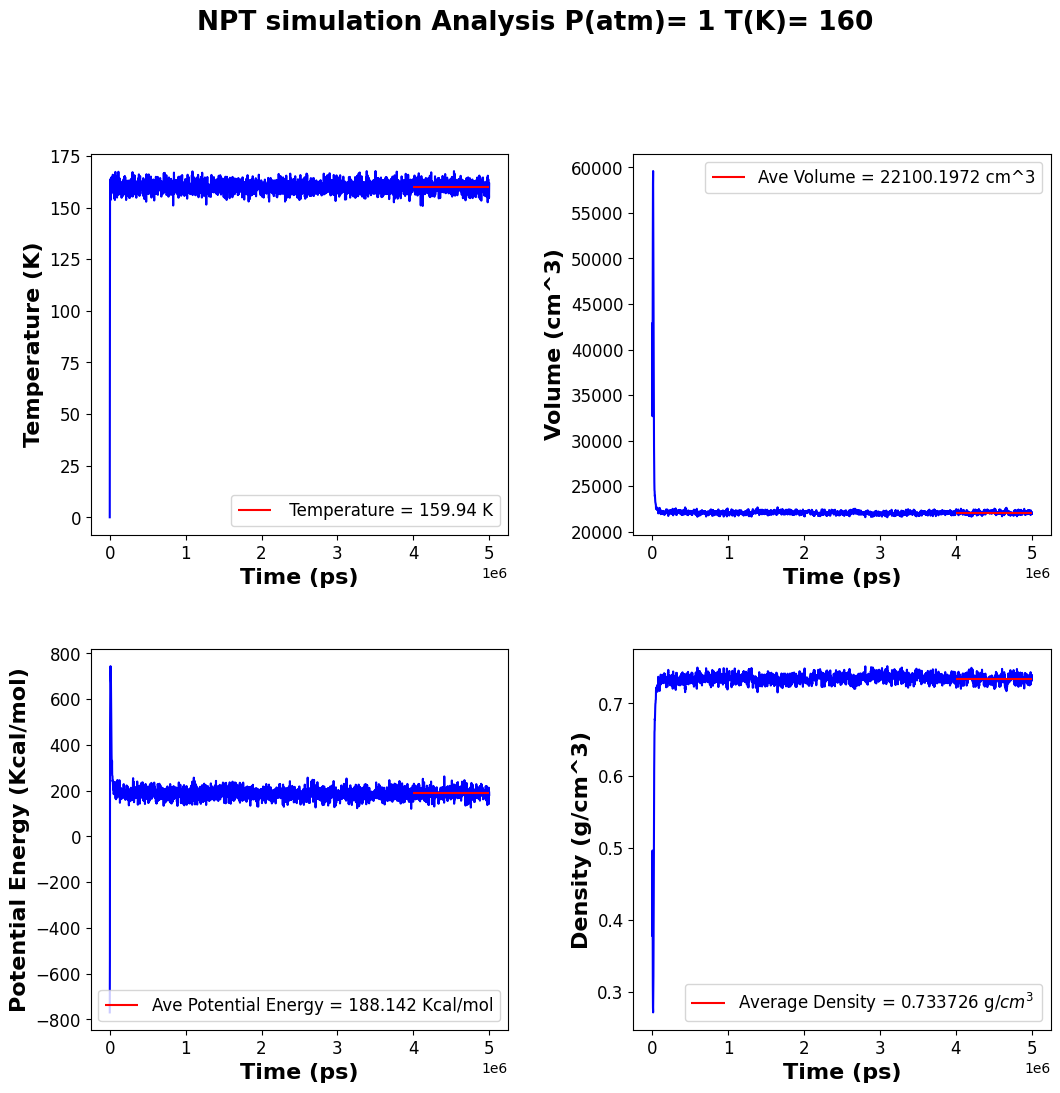

In [3]:
## Use function to read and plot log file of the NPT equilibration of butane at 160 K 

liq_npt_T_160_file = '../classical_MD/T_160K/npt_equil_160K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_160_file,P=1,T=160)

 Average over last 20ps of simulation
Temperature:  175.243  K
Presure:  22618.688  atm
Potencial Energy:  175.243  Kcal/mol
Density:  0.7169  g/cm3


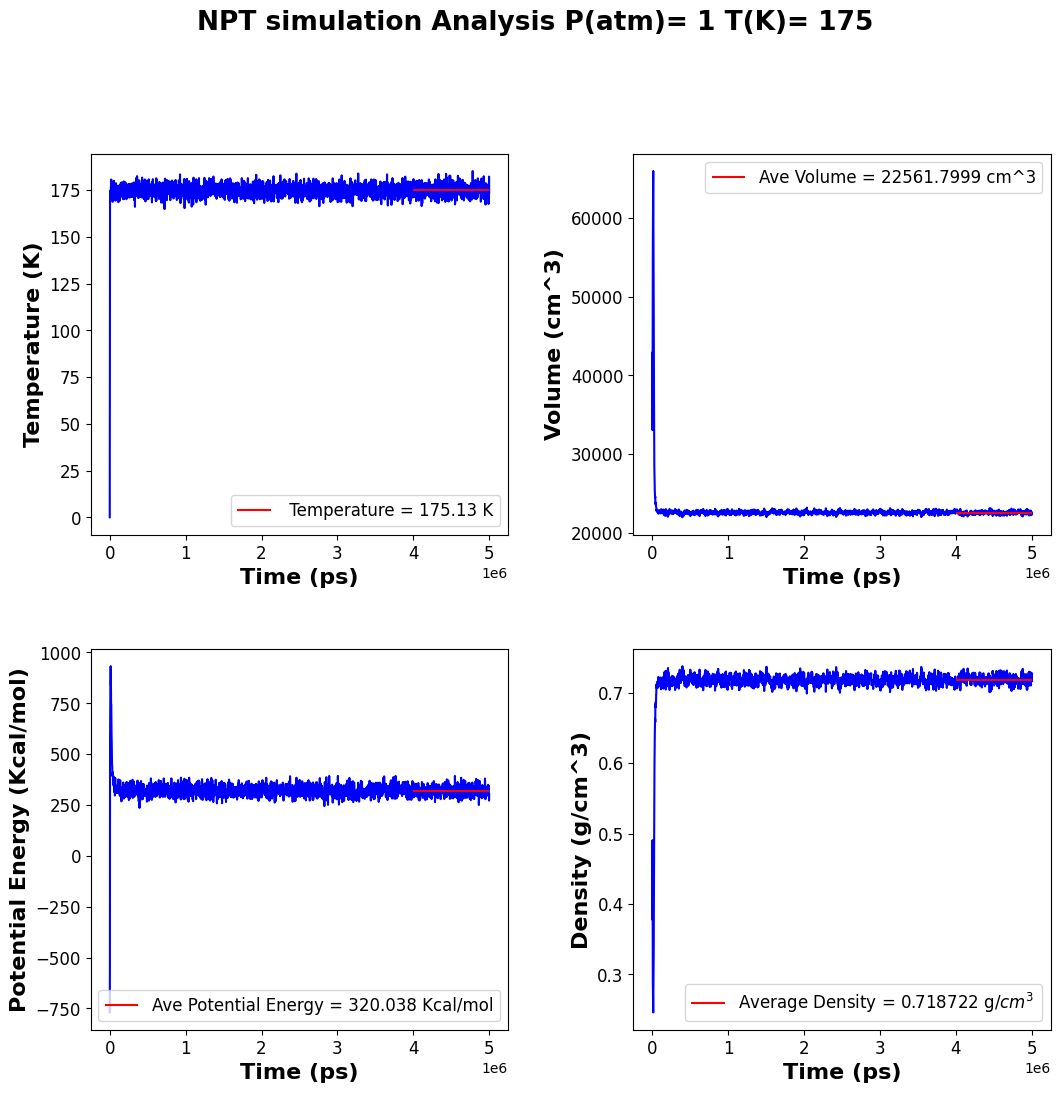

In [6]:
# Repeat for NPT at 175 K

liq_npt_T_175_file = '../classical_MD/T_160K/npt_equil_175K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_175_file,P=1,T=175)

 Average over last 20ps of simulation
Temperature:  200.337  K
Presure:  23517.785  atm
Potencial Energy:  200.337  Kcal/mol
Density:  0.68954  g/cm3


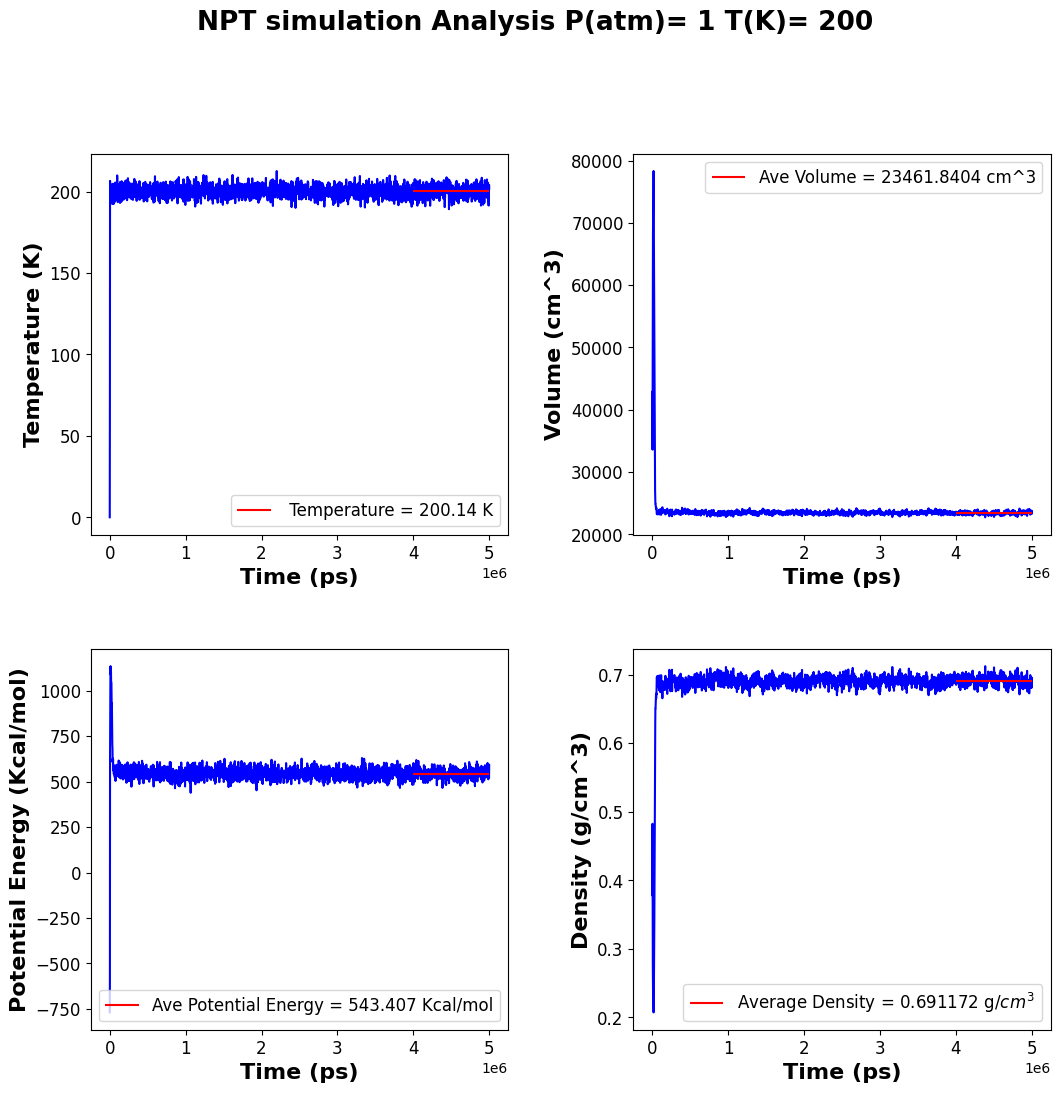

In [9]:
## Repeat for equilibration at 200 K 

liq_npt_T_200_file = '../classical_MD/T_200K/npt_equil_200K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_200_file,P=1,T=200)

 Average over last 20ps of simulation
Temperature:  215.03  K
Presure:  24056.306  atm
Potencial Energy:  215.03  Kcal/mol
Density:  0.67411  g/cm3


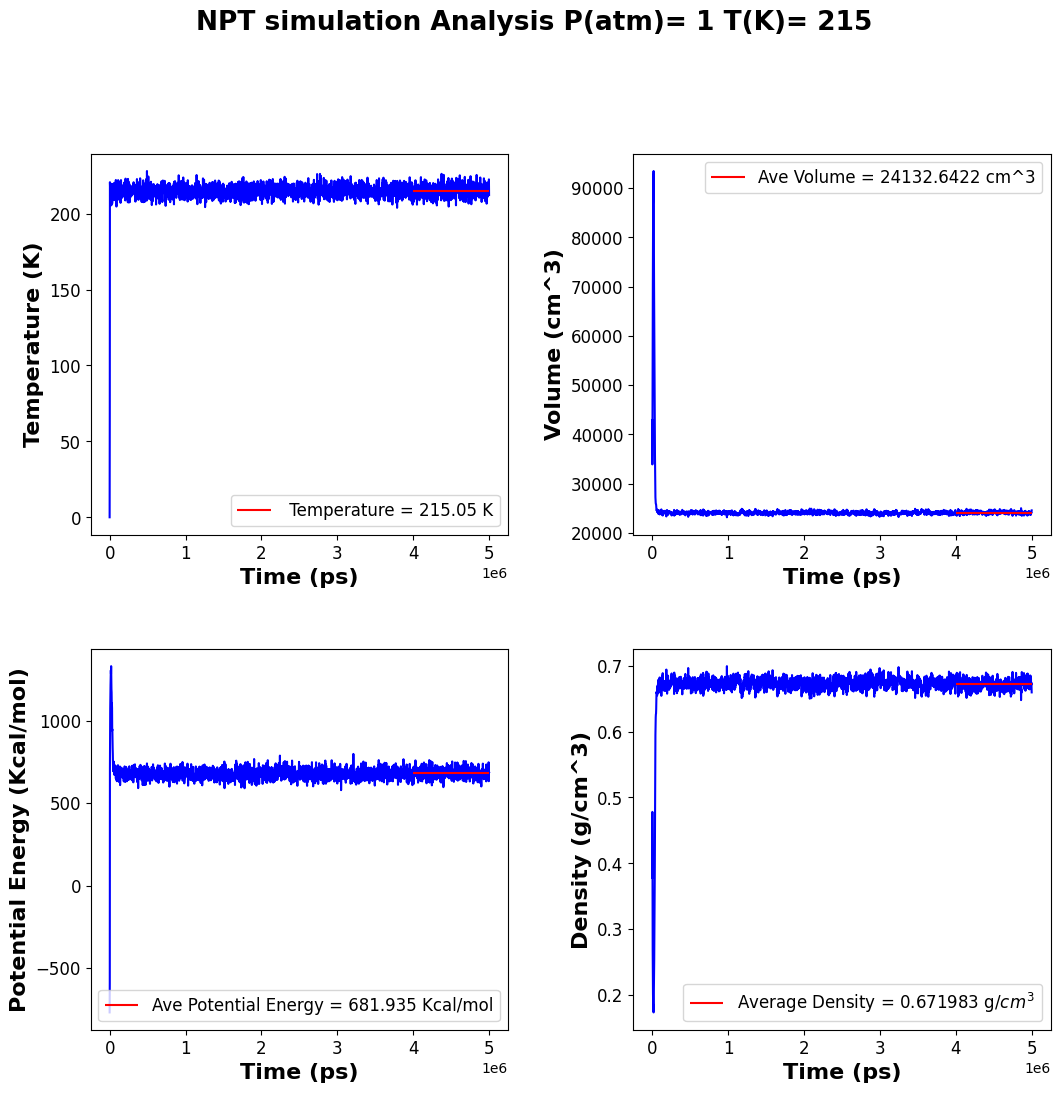

In [11]:
# Repeat for 215 K 

liq_npt_T_215_file = '../classical_MD/T_200K/npt_equil_215K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_215_file,P=1,T=215)

 Average over last 20ps of simulation
Temperature:  250.7  K
Presure:  25712.449  atm
Potencial Energy:  250.7  Kcal/mol
Density:  0.63076  g/cm3


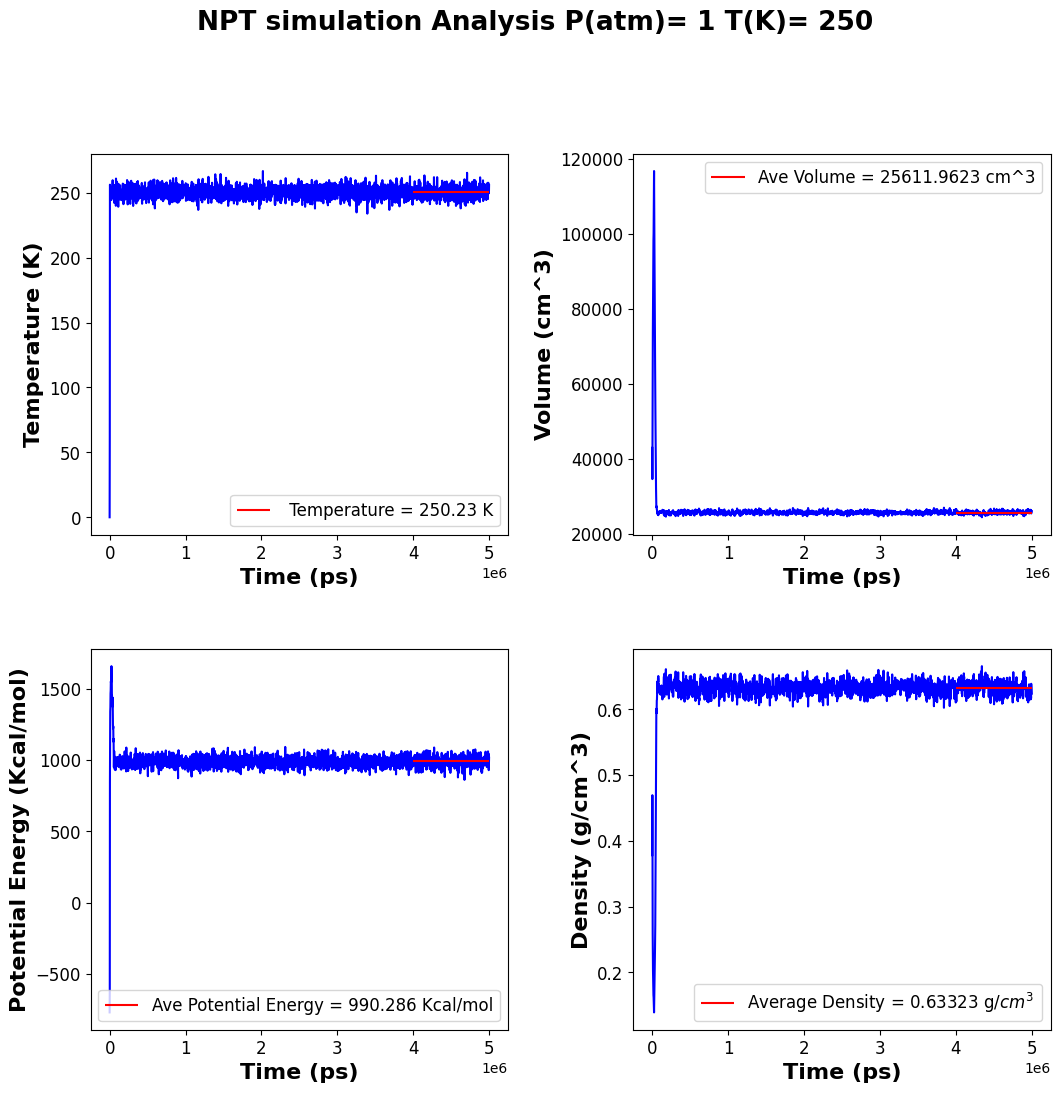

In [12]:
## Repeat for 250K 

liq_npt_T_250_file = '../classical_MD/T_250K/npt_equil_250K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_250_file,P=1,T=250)

 Average over last 20ps of simulation
Temperature:  271.285  K
Presure:  26748.394  atm
Potencial Energy:  271.285  Kcal/mol
Density:  0.60635  g/cm3


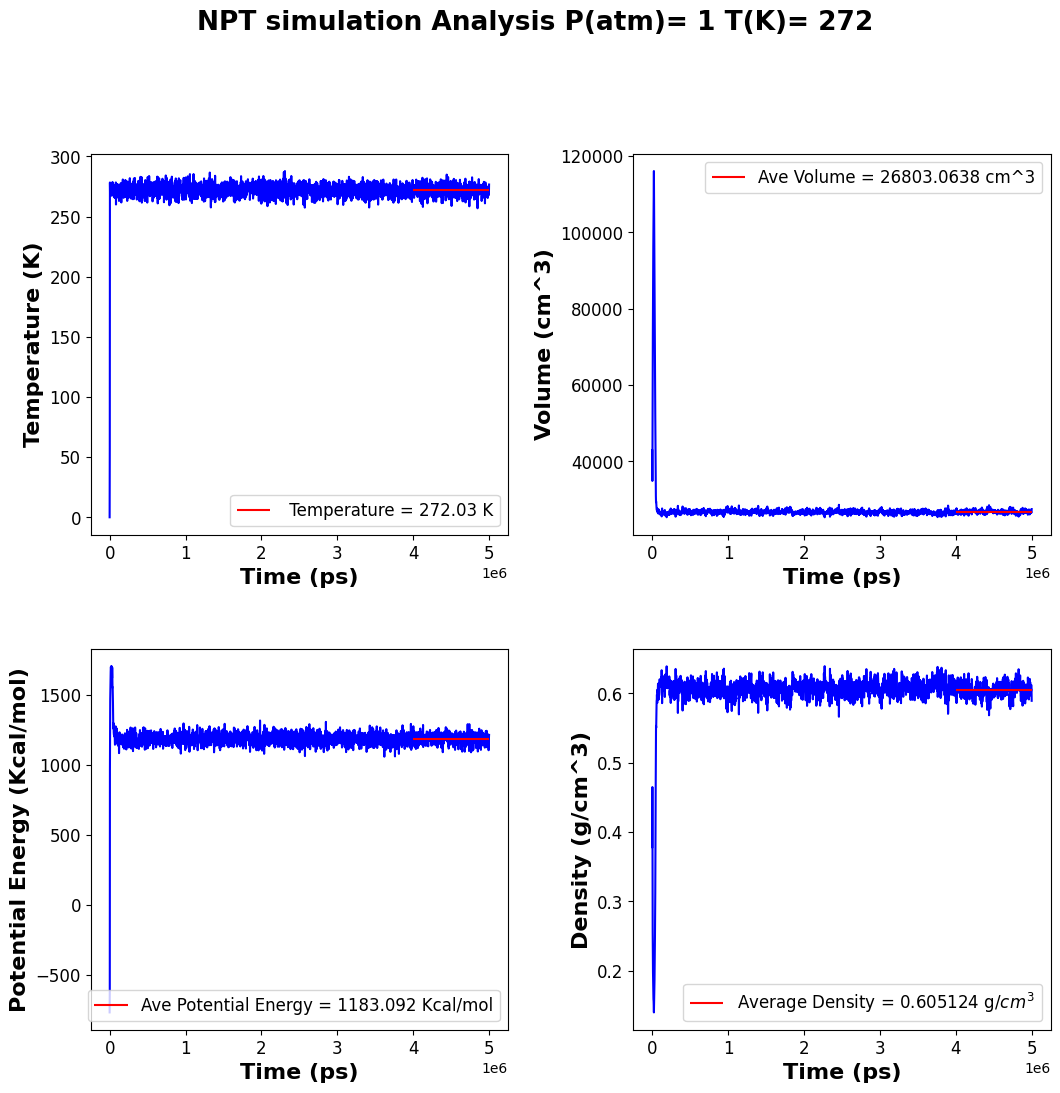

In [14]:
# Repeat for 272 K 

liq_npt_T_272_file = '../classical_MD/T_272K/npt_equil_272K_5ps/log.lammps'

npt_analysis_mid(liq_npt_T_272_file,P=1,T=272)

In [ ]:
## Use the average volumes showed in the plots for the fix deform command in the NVT equilibration of 1 ns. 